Corpus

In [1]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [19]:
text = nltk.corpus.gutenberg.raw("milton-paradise.txt")

Preprocessing

In [28]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Tokenization
tokens1 = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

# Join the preprocessed tokens into a single string
preprocessed_corpus = " ".join(stemmed_tokens)

# Print the preprocessed text
print("Preprocessed Text:")
print(preprocessed_corpus)


Preprocessed Text:
[ paradi lost john milton 1667 ] book man 's first disobedi , fruit forbidden tree whose mortal tast brought death world , woe , loss eden , till one greater man restor us , regain bliss seat , sing , heavenli muse , , secret top oreb , sinai , didst inspir shepherd first taught chosen seed begin heaven earth rose chao : , sion hill delight thee , siloa 's brook flow fast oracl god , thenc invok thi aid adventur song , middl flight intend soar abov th ' aonian mount , pursu thing unattempt yet prose rhyme . chiefli thou , spirit , dost prefer befor templ th ' upright heart pure , instruct , thou know'st ; thou first wast present , , mighti wing outspread , dove-lik sat'st brood vast abyss , mad'st pregnant : dark illumin , low rai support ; , height great argument , may assert etern provid , justifi way god men . say first -- heaven hide noth thi view , deep tract hell -- say first cau move grand parent , happi state , favour heaven highli , fall creator , transgress

In [29]:
tokens1

['[',
 'Paradise',
 'Lost',
 'by',
 'John',
 'Milton',
 '1667',
 ']',
 'Book',
 'I',
 'Of',
 'Man',
 "'s",
 'first',
 'disobedience',
 ',',
 'and',
 'the',
 'fruit',
 'Of',
 'that',
 'forbidden',
 'tree',
 'whose',
 'mortal',
 'taste',
 'Brought',
 'death',
 'into',
 'the',
 'World',
 ',',
 'and',
 'all',
 'our',
 'woe',
 ',',
 'With',
 'loss',
 'of',
 'Eden',
 ',',
 'till',
 'one',
 'greater',
 'Man',
 'Restore',
 'us',
 ',',
 'and',
 'regain',
 'the',
 'blissful',
 'seat',
 ',',
 'Sing',
 ',',
 'Heavenly',
 'Muse',
 ',',
 'that',
 ',',
 'on',
 'the',
 'secret',
 'top',
 'Of',
 'Oreb',
 ',',
 'or',
 'of',
 'Sinai',
 ',',
 'didst',
 'inspire',
 'That',
 'shepherd',
 'who',
 'first',
 'taught',
 'the',
 'chosen',
 'seed',
 'In',
 'the',
 'beginning',
 'how',
 'the',
 'heavens',
 'and',
 'earth',
 'Rose',
 'out',
 'of',
 'Chaos',
 ':',
 'or',
 ',',
 'if',
 'Sion',
 'hill',
 'Delight',
 'thee',
 'more',
 ',',
 'and',
 'Siloa',
 "'s",
 'brook',
 'that',
 'flowed',
 'Fast',
 'by',
 'the',
 

Herdan's Law

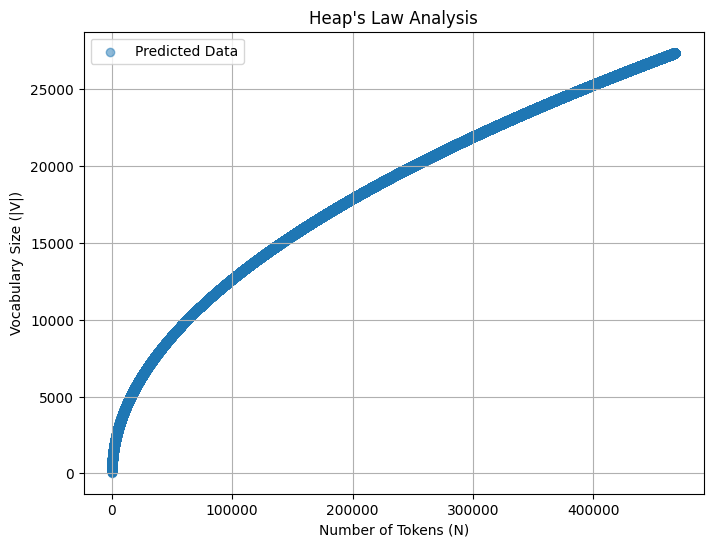

In [4]:
k = 40  
beta = 0.5  

def calculate_n_v(corpus):
    N = 0
    vocabulary = set()

    for sentence in corpus:
        N += len(sentence)
        vocabulary.update(sentence)

    V = len(vocabulary)

    return N, V

N, V = calculate_n_v(text)

# Calculate |V| using Heap's Law
V_predicted = [k * (N ** beta) for N in range(1, N + 1)]

# Create a new figure for the plot
plt.figure(figsize=(8, 6))

# Scatter plot of N vs. |V| based on the predicted values
plt.scatter(range(1, N + 1), V_predicted, label="Predicted Data", alpha=0.5)

plt.xlabel("Number of Tokens (N)")
plt.ylabel("Vocabulary Size (|V|)")
plt.title("Heap's Law Analysis")
plt.legend()

plt.grid(True)

plt.show()


Vocabulary with correct Spellings

In [5]:
from spellchecker import SpellChecker  # Import the SpellChecker

# Initialize NLTK's English stopwords
stop_words = set(stopwords.words("english"))

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Tokenize the text into words
words = word_tokenize(preprocessed_corpus)

# Lowercase the words
words = [word.lower() for word in words]

# Remove stopwords and non-alphabetic words
words = [word for word in words if word.isalpha() and word not in stop_words]

# Apply stemming (you can also use lemmatization)
words = [stemmer.stem(word) for word in words]

# Create a SpellChecker instance
spell = SpellChecker()

# Perform spell-checking and correction
for i in range(len(words)):
    corrected_word = spell.correction(words[i])
    if corrected_word != words[i]:
        print(f"Original: {words[i]}, Corrected: {corrected_word}")
    words[i] = corrected_word

# Build a vocabulary of words
vocabulary1 = set(words)


Original: paradi, Corrected: parade
Original: disobedi, Corrected: disobey
Original: tast, Corrected: last
Original: restor, Corrected: restore
Original: heavenli, Corrected: heavenly
Original: oreb, Corrected: ore
Original: sinai, Corrected: shinai
Original: inspir, Corrected: inspire
Original: siloa, Corrected: silo
Original: oracl, Corrected: oral
Original: thenc, Corrected: then
Original: invok, Corrected: invoke
Original: adventur, Corrected: adventure
Original: middl, Corrected: middle
Original: th, Corrected: the
Original: aonian, Corrected: ionian
Original: pursu, Corrected: pursue
Original: unattempt, Corrected: attempt
Original: chiefli, Corrected: chiefly
Original: templ, Corrected: temple
Original: th, Corrected: the
Original: mighti, Corrected: might
Original: outspread, Corrected: outspend
Original: illumin, Corrected: illumine
Original: etern, Corrected: stern
Original: provid, Corrected: provide
Original: justifi, Corrected: justify
Original: noth, Corrected: not
Origin

Original: unblest, Corrected: unless
Original: glori, Corrected: glory
Original: recov, Corrected: recon
Original: supern, Corrected: super
Original: celesti, Corrected: celeste
Original: sinc, Corrected: since
Original: dispo, Corrected: disco
Original: forc, Corrected: for
Original: suprem, Corrected: supreme
Original: farewel, Corrected: farewell
Original: happi, Corrected: happy
Original: infern, Corrected: intern
Original: receiv, Corrected: receive
Original: th, Corrected: the
Original: almighti, Corrected: almighty
Original: envi, Corrected: envy
Original: henc, Corrected: hence
Original: reigh, Corrected: weigh
Original: secur, Corrected: secure
Original: choic, Corrected: choice
Original: ambit, Corrected: gambit
Original: wherefor, Corrected: wherefore
Original: th, Corrected: the
Original: associ, Corrected: cassock
Original: th, Corrected: the
Original: oblivi, Corrected: olive
Original: unhappi, Corrected: unhappy
Original: ralli, Corrected: rally
Original: beelzebub, Corr

Original: ascalon, Corrected: salon
Original: accaron, Corrected: None
Original: rimmon, Corrected: common
Original: damascu, Corrected: damascus
Original: fertil, Corrected: fertile
Original: abbana, Corrected: banana
Original: pharphar, Corrected: None
Original: ahaz, Corrected: aha
Original: sottish, Corrected: scottish
Original: disparag, Corrected: disparage
Original: displac, Corrected: display
Original: odiou, Corrected: odious
Original: ador, Corrected: adore
Original: osiri, Corrected: siri
Original: oru, Corrected: or
Original: monstrou, Corrected: monstrous
Original: sorceri, Corrected: sorcery
Original: fanat, Corrected: want
Original: disgui, Corrected: disguise
Original: th, Corrected: the
Original: oreb, Corrected: ore
Original: doubl, Corrected: doubt
Original: bethel, Corrected: betel
Original: belial, Corrected: bell
Original: templ, Corrected: temple
Original: templ, Corrected: temple
Original: violenc, Corrected: violent
Original: palac, Corrected: palace
Original: 

Original: alcairo, Corrected: cairo
Original: magnif, Corrected: magnify
Original: glori, Corrected: glory
Original: enshrin, Corrected: enshrine
Original: belu, Corrected: bell
Original: serapi, Corrected: seraph
Original: assyria, Corrected: assyrian
Original: luxuri, Corrected: luxury
Original: th, Corrected: the
Original: discov, Corrected: disco
Original: ampl, Corrected: ample
Original: subtl, Corrected: subtle
Original: starri, Corrected: starry
Original: cresset, Corrected: dressed
Original: naptha, Corrected: nathan
Original: asphaltu, Corrected: asphalt
Original: hasti, Corrected: hast
Original: multitud, Corrected: multitude
Original: admir, Corrected: admit
Original: prai, Corrected: pray
Original: structur, Corrected: structure
Original: sceptr, Corrected: scepter
Original: resid, Corrected: reside
Original: princ, Corrected: prince
Original: suprem, Corrected: supreme
Original: hierarchi, Corrected: hierarchy
Original: unador, Corrected: under
Original: greec, Corrected: 

Original: impend, Corrected: spend
Original: hideou, Corrected: hideous
Original: perhap, Corrected: perhaps
Original: gloriou, Corrected: glorious
Original: fieri, Corrected: fiery
Original: transfix, Corrected: transfer
Original: wrapt, Corrected: wrap
Original: conver, Corrected: cover
Original: everlast, Corrected: overcast
Original: unrespit, Corrected: unrest
Original: unpiti, Corrected: unit
Original: unrepriev, Corrected: None
Original: alik, Corrected: alike
Original: voic, Corrected: voice
Original: dissuad, Corrected: dissuade
Original: forc, Corrected: for
Original: guil, Corrected: guilt
Original: deceiv, Corrected: deceive
Original: derid, Corrected: deride
Original: almighti, Corrected: almighty
Original: frustrat, Corrected: frustrate
Original: trampl, Corrected: tramp
Original: advic, Corrected: advice
Original: sinc, Corrected: since
Original: inevit, Corrected: invite
Original: subdu, Corrected: subdue
Original: omnipot, Corrected: None
Original: decr, Corrected: dea

Original: indefatig, Corrected: None
Original: arriv, Corrected: arrive
Original: happi, Corrected: happy
Original: suffic, Corrected: suffice
Original: senteri, Corrected: enter
Original: choic, Corrected: choice
Original: suffrag, Corrected: suffrage
Original: reli, Corrected: rely
Original: suspen, Corrected: suspend
Original: undertak, Corrected: undertake
Original: counten, Corrected: counter
Original: choic, Corrected: choice
Original: hardi, Corrected: hard
Original: alon, Corrected: along
Original: voyag, Corrected: voyage
Original: glori, Corrected: glory
Original: consciou, Corrected: conscious
Original: unmov, Corrected: union
Original: progeni, Corrected: progeny
Original: empyr, Corrected: empty
Original: silenc, Corrected: silence
Original: demur, Corrected: femur
Original: seiz, Corrected: seize
Original: undismay, Corrected: dismay
Original: outrag, Corrected: outrage
Original: immur, Corrected: immer
Original: ninefold, Corrected: fivefold
Original: unessenti, Correcte

Original: ternat, Corrected: treat
Original: tidor, Corrected: tudor
Original: whenc, Corrected: when
Original: spici, Corrected: spice
Original: pli, Corrected: li
Original: nightli, Corrected: nightly
Original: fli, Corrected: fly
Original: adamantin, Corrected: adamant
Original: impenetr, Corrected: None
Original: impal, Corrected: impale
Original: circl, Corrected: circle
Original: unconsum, Corrected: None
Original: formid, Corrected: formed
Original: scali, Corrected: scale
Original: volumin, Corrected: volume
Original: middl, Corrected: middle
Original: cri, Corrected: cry
Original: cerberean, Corrected: None
Original: hideou, Corrected: hideous
Original: calabria, Corrected: calabrian
Original: trinacrian, Corrected: None
Original: danc, Corrected: dance
Original: lapland, Corrected: garland
Original: eclip, Corrected: clip
Original: substanc, Corrected: substance
Original: fierc, Corrected: fierce
Original: terribl, Corrected: terrible
Original: kingli, Corrected: kingly
Origi

Original: audaci, Corrected: audacity
Original: vacuiti, Corrected: acuity
Original: unawar, Corrected: unaware
Original: pennon, Corrected: lennon
Original: chanc, Corrected: chance
Original: tumultu, Corrected: tumult
Original: nitr, Corrected: nitro
Original: hurri, Corrected: hurry
Original: boggi, Corrected: boggy
Original: syrti, Corrected: sort
Original: fli, Corrected: fly
Original: behov, Corrected: behove
Original: gryphon, Corrected: krypton
Original: moori, Corrected: moors
Original: pursu, Corrected: pursue
Original: arimaspian, Corrected: None
Original: custodi, Corrected: custody
Original: eagerli, Corrected: eagerly
Original: pursu, Corrected: pursue
Original: fli, Corrected: fly
Original: univ, Corrected: unit
Original: voic, Corrected: voice
Original: confu, Corrected: conf
Original: vehem, Corrected: them
Original: pli, Corrected: li
Original: undaunt, Corrected: undaunted
Original: whatev, Corrected: what
Original: nethermost, Corrected: None
Original: resid, Correc

Original: foreknew, Corrected: None
Original: foreknowledg, Corrected: foreknowledge
Original: influenc, Corrected: influence
Original: unforeknown, Corrected: None
Original: impul, Corrected: impel
Original: immut, Corrected: immune
Original: judg, Corrected: judge
Original: natur, Corrected: nature
Original: revok, Corrected: revoke
Original: decr, Corrected: dear
Original: unchang, Corrected: punching
Original: etern, Corrected: stern
Original: deceiv, Corrected: deceive
Original: justic, Corrected: justice
Original: glori, Corrected: glory
Original: ambrosi, Corrected: ambrosia
Original: fragranc, Corrected: fragrance
Original: ineff, Corrected: info
Original: diffu, Corrected: diff
Original: compar, Corrected: compare
Original: gloriou, Corrected: glorious
Original: substanti, Corrected: substantia
Original: divin, Corrected: divine
Original: visibl, Corrected: visible
Original: measur, Corrected: measure
Original: graciou, Corrected: gracious
Original: clo, Corrected: lo
Original

Original: unexampl, Corrected: None
Original: divin, Corrected: divine
Original: copiou, Corrected: copious
Original: prai, Corrected: pray
Original: prai, Corrected: pray
Original: disjoin, Corrected: disown
Original: starri, Corrected: starry
Original: happi, Corrected: happy
Original: opac, Corrected: opal
Original: divid, Corrected: divide
Original: lumin, Corrected: lumen
Original: inferiour, Corrected: inferior
Original: enclo, Corrected: uncle
Original: inroad, Corrected: inroads
Original: contin, Corrected: contain
Original: larg, Corrected: large
Original: spaciou, Corrected: spacious
Original: vultur, Corrected: vulture
Original: imau, Corrected: ima
Original: snowi, Corrected: snow
Original: ridg, Corrected: ride
Original: dislodg, Corrected: dislodge
Original: scarc, Corrected: scare
Original: gorg, Corrected: gorge
Original: yeanl, Corrected: yeahl
Original: fli, Corrected: fly
Original: hydasp, Corrected: None
Original: sericana, Corrected: americana
Original: chine, Corr

Original: unperceiv, Corrected: None
Original: hypocrisi, Corrected: hypocrisy
Original: invi, Corrected: ini
Original: alon, Corrected: along
Original: permiss, Corrected: permits
Original: simplic, Corrected: simple
Original: charg, Corrected: charge
Original: beguil, Corrected: beguile
Original: fraudul, Corrected: fraud
Original: desir, Corrected: desire
Original: therebi, Corrected: thereby
Original: glorifi, Corrected: glorify
Original: prai, Corrected: pray
Original: empyr, Corrected: empty
Original: alon, Corrected: along
Original: perhap, Corrected: perhaps
Original: remembr, Corrected: remember
Original: infinit, Corrected: infinite
Original: cau, Corrected: can
Original: materi, Corrected: mater
Original: confu, Corrected: conf
Original: voic, Corrected: voice
Original: infinitud, Corrected: infinite
Original: confin, Corrected: coffin
Original: disord, Corrected: discord
Original: cumbrou, Corrected: None
Original: quintess, Corrected: quietest
Original: variou, Corrected: 

Original: seleucia, Corrected: None
Original: telassar, Corrected: None
Original: fertil, Corrected: fertile
Original: cau, Corrected: can
Original: tast, Corrected: last
Original: emin, Corrected: mein
Original: ambrosi, Corrected: ambrosia
Original: veget, Corrected: beget
Original: knowledg, Corrected: knowledge
Original: knowledg, Corrected: knowledge
Original: larg, Corrected: large
Original: shaggi, Corrected: shaggy
Original: ingulf, Corrected: engulf
Original: porou, Corrected: porous
Original: kindli, Corrected: kindly
Original: rill, Corrected: will
Original: thenc, Corrected: then
Original: darksom, Corrected: darkroom
Original: passag, Corrected: passage
Original: divid, Corrected: divide
Original: famou, Corrected: famous
Original: countri, Corrected: country
Original: sapphir, Corrected: sapphire
Original: mazi, Corrected: nazi
Original: errour, Corrected: error
Original: worthi, Corrected: worth
Original: paradi, Corrected: parade
Original: curiou, Corrected: curious
Ori

Original: unmov, Corrected: union
Original: expan, Corrected: expand
Original: unexperienc, Corrected: inexperience
Original: anoth, Corrected: anyth
Original: opposit, Corrected: opposite
Original: wateri, Corrected: water
Original: sympathi, Corrected: sympathy
Original: desir, Corrected: desire
Original: voic, Corrected: voice
Original: creatur, Corrected: creature
Original: goe, Corrected: got
Original: embrac, Corrected: embrace
Original: imag, Corrected: image
Original: thenc, Corrected: then
Original: invi, Corrected: ini
Original: espi, Corrected: epi
Original: platan, Corrected: plan
Original: amiabl, Corrected: amiable
Original: wateri, Corrected: water
Original: imag, Corrected: image
Original: cryedst, Corrected: credit
Original: individu, Corrected: individual
Original: solac, Corrected: solar
Original: gentl, Corrected: gentle
Original: beauti, Corrected: beauty
Original: manli, Corrected: manly
Original: alon, Corrected: along
Original: truli, Corrected: truly
Original: 

Original: resplend, Corrected: respond
Original: starri, Corrected: starry
Original: madest, Corrected: modest
Original: omnipot, Corrected: None
Original: happi, Corrected: happy
Original: delici, Corrected: device
Original: larg, Corrected: large
Original: abund, Corrected: abound
Original: partak, Corrected: partake
Original: uncropt, Corrected: encrypt
Original: promi, Corrected: prom
Original: infinit, Corrected: infinite
Original: unanim, Corrected: uranium
Original: observ, Corrected: observe
Original: ador, Corrected: adore
Original: troublesom, Corrected: troublesome
Original: disgui, Corrected: disguise
Original: spou, Corrected: spot
Original: mysteri, Corrected: mystery
Original: connubi, Corrected: connubial
Original: refu, Corrected: ref
Original: whatev, Corrected: what
Original: hypocrit, Corrected: hypocrite
Original: auster, Corrected: muster
Original: puriti, Corrected: purity
Original: innoc, Corrected: into
Original: defam, Corrected: defame
Original: impur, Correc

Original: fledst, Corrected: least
Original: infern, Corrected: intern
Original: facil, Corrected: fail
Original: slightli, Corrected: slightly
Original: repli, Corrected: reply
Original: captiv, Corrected: captive
Original: limitari, Corrected: dimitri
Original: compeer, Corrected: computer
Original: drawest, Corrected: rawest
Original: angelick, Corrected: angelic
Original: fieri, Corrected: fiery
Original: cere, Corrected: were
Original: plowman, Corrected: lawman
Original: sheav, Corrected: shear
Original: dilat, Corrected: dilate
Original: teneriff, Corrected: None
Original: atla, Corrected: atta
Original: unremov, Corrected: None
Original: statur, Corrected: status
Original: horrour, Corrected: horror
Original: ensu, Corrected: ensue
Original: paradi, Corrected: parade
Original: commot, Corrected: common
Original: starri, Corrected: starry
Original: perhap, Corrected: perhaps
Original: violenc, Corrected: violent
Original: etern, Corrected: stern
Original: astrea, Corrected: area

Original: darksom, Corrected: darkroom
Original: paradi, Corrected: parade
Original: conver, Corrected: cover
Original: findest, Corrected: finest
Original: retir, Corrected: retire
Original: respit, Corrected: respite
Original: discour, Corrected: discover
Original: advi, Corrected: adi
Original: happi, Corrected: happy
Original: happi, Corrected: happy
Original: mutabl, Corrected: metal
Original: whenc, Corrected: when
Original: bewar, Corrected: bear
Original: swerv, Corrected: swerve
Original: secur, Corrected: secure
Original: enemi, Corrected: enemy
Original: violenc, Corrected: violent
Original: surpri, Corrected: surprise
Original: unadmonish, Corrected: admonish
Original: unforewarn, Corrected: forewarn
Original: etern, Corrected: stern
Original: justic, Corrected: justice
Original: charg, Corrected: charge
Original: receiv, Corrected: receive
Original: celesti, Corrected: celeste
Original: gorgeou, Corrected: gorgeous
Original: angelick, Corrected: angelic
Original: quir, Cor

Original: effulg, Corrected: effing
Original: wari, Corrected: war
Original: empyr, Corrected: empty
Original: minist, Corrected: finish
Original: lowli, Corrected: lowly
Original: vouchsaf, Corrected: vouchsafe
Original: earthli, Corrected: earthly
Original: tast, Corrected: last
Original: willingli, Corrected: willingly
Original: compar, Corrected: compare
Original: hierarch, Corrected: hierarchy
Original: repli, Corrected: reply
Original: almighti, Corrected: almighty
Original: deprav, Corrected: deprave
Original: endu, Corrected: end
Original: variou, Corrected: various
Original: variou, Corrected: various
Original: degr, Corrected: dear
Original: substanc, Corrected: substance
Original: refin, Corrected: rein
Original: activ, Corrected: active
Original: bodi, Corrected: body
Original: proport, Corrected: report
Original: thenc, Corrected: then
Original: aeri, Corrected: ari
Original: consumm, Corrected: consume
Original: sublim, Corrected: sublime
Original: aspir, Corrected: aspir

Original: abstrusest, Corrected: None
Original: holi, Corrected: hold
Original: nightli, Corrected: nightly
Original: multitud, Corrected: multitude
Original: decr, Corrected: dear
Original: glori, Corrected: glory
Original: resplend, Corrected: respond
Original: nearli, Corrected: nearly
Original: omnipot, Corrected: None
Original: deiti, Corrected: deity
Original: empir, Corrected: empire
Original: spaciou, Corrected: spacious
Original: battl, Corrected: battle
Original: advi, Corrected: adi
Original: forc, Corrected: for
Original: defenc, Corrected: defend
Original: unawar, Corrected: unaware
Original: sanctuari, Corrected: sanctuary
Original: lightn, Corrected: light
Original: divin, Corrected: divine
Original: ineff, Corrected: info
Original: seren, Corrected: seen
Original: mighti, Corrected: might
Original: justli, Corrected: justly
Original: deri, Corrected: der
Original: secur, Corrected: secure
Original: laughest, Corrected: laughs
Original: glori, Corrected: glory
Original: 

Original: sovran, Corrected: soprano
Original: voic, Corrected: voice
Original: duski, Corrected: dusk
Original: reluct, Corrected: result
Original: awak, Corrected: away
Original: milit, Corrected: milt
Original: mighti, Corrected: might
Original: quadrat, Corrected: quadrant
Original: irresist, Corrected: resist
Original: silenc, Corrected: silence
Original: harmoni, Corrected: harmony
Original: heroick, Corrected: heroic
Original: adventur, Corrected: adventure
Original: cau, Corrected: can
Original: indissolubl, Corrected: indissoluble
Original: obviou, Corrected: obvious
Original: straiten, Corrected: straighten
Original: divid, Corrected: divide
Original: passiv, Corrected: passive
Original: upbor, Corrected: upfor
Original: nimbl, Corrected: nimble
Original: orderli, Corrected: orderly
Original: receiv, Corrected: receive
Original: provinc, Corrected: proving
Original: terren, Corrected: terre
Original: fieri, Corrected: fiery
Original: battail, Corrected: attain
Original: brist

Original: conspicu, Corrected: conspire
Original: imagin, Corrected: imagine
Original: highth, Corrected: eighth
Original: godlik, Corrected: godlike
Original: statur, Corrected: status
Original: decid, Corrected: decide
Original: empir, Corrected: empire
Original: fieri, Corrected: fiery
Original: circl, Corrected: circle
Original: opposit, Corrected: opposite
Original: horrour, Corrected: horror
Original: retir, Corrected: retire
Original: erst, Corrected: rest
Original: angelick, Corrected: angelic
Original: larg, Corrected: large
Original: unsaf, Corrected: unsafe
Original: commot, Corrected: common
Original: natur, Corrected: nature
Original: constel, Corrected: monster
Original: opposit, Corrected: opposite
Original: togeth, Corrected: toget
Original: almighti, Corrected: almighty
Original: immin, Corrected: main
Original: determin, Corrected: determine
Original: armouri, Corrected: armour
Original: edg, Corrected: edge
Original: forc, Corrected: for
Original: rever, Corrected: n

Original: unespi, Corrected: None
Original: matin, Corrected: main
Original: panopli, Corrected: panoply
Original: refulg, Corrected: refuse
Original: descri, Corrected: desire
Original: lodg, Corrected: long
Original: zophiel, Corrected: sophie
Original: fli, Corrected: fly
Original: cri, Corrected: cry
Original: warriour, Corrected: warrior
Original: settl, Corrected: settle
Original: resolut, Corrected: resolute
Original: secur, Corrected: secure
Original: adamantin, Corrected: adamant
Original: conjectur, Corrected: conjecture
Original: drizzl, Corrected: drizzle
Original: rattl, Corrected: rattle
Original: awar, Corrected: away
Original: impedi, Corrected: impede
Original: embattl, Corrected: embattled
Original: heavi, Corrected: heavy
Original: engineri, Corrected: engine
Original: impal, Corrected: impale
Original: everi, Corrected: ever
Original: suddenli, Corrected: suddenly
Original: peac, Corrected: peace
Original: composur, Corrected: composer
Original: readi, Corrected: re

Original: obsequi, Corrected: obsequies
Original: floweret, Corrected: flowered
Original: obdur, Corrected: our
Original: rebelli, Corrected: rebel
Original: ralli, Corrected: rally
Original: insen, Corrected: ingen
Original: conceiv, Corrected: conceive
Original: heavenli, Corrected: heavenly
Original: perver, Corrected: server
Original: convinc, Corrected: convince
Original: obdur, Corrected: our
Original: griev, Corrected: grief
Original: glori, Corrected: glory
Original: envi, Corrected: envy
Original: aspir, Corrected: aspire
Original: highth, Corrected: eighth
Original: fierc, Corrected: fierce
Original: forc, Corrected: for
Original: univ, Corrected: unit
Original: battl, Corrected: battle
Original: battl, Corrected: battle
Original: warfar, Corrected: warfare
Original: righteou, Corrected: righteous
Original: cau, Corrected: can
Original: receiv, Corrected: receive
Original: invinc, Corrected: invite
Original: vengeanc, Corrected: vengeance
Original: multitud, Corrected: multit

Original: besought, Corrected: brought
Original: godlik, Corrected: godlike
Original: almighti, Corrected: almighty
Original: tongu, Corrected: tongue
Original: suffic, Corrected: suffice
Original: suffic, Corrected: suffice
Original: glorifi, Corrected: glorify
Original: commiss, Corrected: commits
Original: receiv, Corrected: receive
Original: desir, Corrected: desire
Original: knowledg, Corrected: knowledge
Original: invi, Corrected: ini
Original: omnisci, Corrected: omnis
Original: commun, Corrected: common
Original: besid, Corrected: beside
Original: knowledg, Corrected: knowledge
Original: measur, Corrected: measure
Original: folli, Corrected: folly
Original: lucif, Corrected: lucid
Original: victori, Corrected: victory
Original: omnipot, Corrected: None
Original: etern, Corrected: stern
Original: multitud, Corrected: multitude
Original: enviou, Corrected: envious
Original: rebelli, Corrected: rebel
Original: inaccess, Corrected: access
Original: deiti, Corrected: deity
Original:

Original: plenteou, Corrected: None
Original: gener, Corrected: gene
Original: everi, Corrected: ever
Original: multipli, Corrected: multiple
Original: multipli, Corrected: multiple
Original: innum, Corrected: annum
Original: singl, Corrected: single
Original: pastur, Corrected: pastor
Original: glanc, Corrected: glance
Original: dropt, Corrected: drop
Original: pearli, Corrected: pearl
Original: unwieldi, Corrected: unwieldy
Original: enorm, Corrected: norm
Original: creatur, Corrected: creature
Original: promontori, Corrected: promontory
Original: numer, Corrected: number
Original: kindli, Corrected: kindly
Original: ruptur, Corrected: rupture
Original: disclo, Corrected: disco
Original: fledg, Corrected: fled
Original: sublim, Corrected: sublime
Original: despi, Corrected: desi
Original: eagl, Corrected: eagle
Original: eyri, Corrected: eri
Original: wedg, Corrected: wed
Original: intellig, Corrected: None
Original: aeri, Corrected: ari
Original: fli, Corrected: fly
Original: voyag,

Original: incomprehen, Corrected: None
Original: distanc, Corrected: distance
Original: argu, Corrected: argue
Original: offici, Corrected: office
Original: opac, Corrected: opal
Original: besid, Corrected: beside
Original: admir, Corrected: admit
Original: natur, Corrected: nature
Original: disproport, Corrected: None
Original: superflu, Corrected: superfly
Original: bodi, Corrected: body
Original: impo, Corrected: imp
Original: revolut, Corrected: revolt
Original: sedentari, Corrected: sedentary
Original: nobl, Corrected: noble
Original: receiv, Corrected: receive
Original: tribut, Corrected: tribute
Original: sumless, Corrected: sunless
Original: incorpor, Corrected: None
Original: describ, Corrected: describe
Original: counten, Corrected: counter
Original: studiou, Corrected: studio
Original: abstru, Corrected: absurd
Original: perceiv, Corrected: perceive
Original: retir, Corrected: retire
Original: lowli, Corrected: lowly
Original: majestick, Corrected: majestic
Original: nurseri

Original: untroubl, Corrected: untroubled
Original: insen, Corrected: ingen
Original: dissolv, Corrected: dissolve
Original: suddenli, Corrected: suddenly
Original: apparit, Corrected: apart
Original: gentli, Corrected: gentle
Original: fanci, Corrected: fancy
Original: divin, Corrected: divine
Original: innum, Corrected: annum
Original: guid, Corrected: guide
Original: prepar, Corrected: prepare
Original: woodi, Corrected: woods
Original: enclo, Corrected: uncle
Original: goodliest, Corrected: goodies
Original: scarc, Corrected: scare
Original: loaden, Corrected: loaded
Original: whereat, Corrected: whereas
Original: guid, Corrected: guide
Original: presenc, Corrected: present
Original: divin, Corrected: divine
Original: rejoic, Corrected: rejoice
Original: ador, Corrected: adore
Original: submiss, Corrected: submits
Original: soughtest, Corrected: slightest
Original: mildli, Corrected: mildly
Original: paradi, Corrected: parade
Original: everi, Corrected: ever
Original: freeli, Corre

Original: otherwi, Corrected: other
Original: commot, Corrected: common
Original: strang, Corrected: strong
Original: superiour, Corrected: superior
Original: unmov, Corrected: union
Original: beauti, Corrected: beauty
Original: glanc, Corrected: glance
Original: natur, Corrected: nature
Original: subduct, Corrected: subject
Original: perhap, Corrected: perhaps
Original: elabor, Corrected: labor
Original: natur, Corrected: nature
Original: inferiour, Corrected: inferior
Original: faculti, Corrected: faculty
Original: resembl, Corrected: resemble
Original: imag, Corrected: image
Original: charact, Corrected: character
Original: creatur, Corrected: creature
Original: absolut, Corrected: absolute
Original: complet, Corrected: complete
Original: virtuousest, Corrected: None
Original: discreetest, Corrected: None
Original: knowledg, Corrected: knowledge
Original: presenc, Corrected: present
Original: degrad, Corrected: degrade
Original: discour, Corrected: discover
Original: discountenanc, 

Original: terrestri, Corrected: terrestrial
Original: danc, Corrected: dance
Original: offici, Corrected: office
Original: alon, Corrected: along
Original: concentr, Corrected: concern
Original: preciou, Corrected: precious
Original: sacr, Corrected: sack
Original: influenc, Corrected: influence
Original: centr, Corrected: center
Original: receivest, Corrected: receives
Original: virtu, Corrected: virtue
Original: creatur, Corrected: creature
Original: anim, Corrected: aim
Original: interchang, Corrected: interchange
Original: refug, Corrected: refuge
Original: pleasur, Corrected: pleasure
Original: contrari, Corrected: contrary
Original: becom, Corrected: become
Original: suprem, Corrected: supreme
Original: therebi, Corrected: thereby
Original: redound, Corrected: rebound
Original: glori, Corrected: glory
Original: infern, Corrected: intern
Original: almighti, Corrected: almighty
Original: continu, Corrected: continue
Original: contriv, Corrected: contrive
Original: perhap, Corrected

Original: obedi, Corrected: bed
Original: unsought, Corrected: sought
Original: secur, Corrected: secure
Original: seemest, Corrected: seems
Original: nativ, Corrected: native
Original: innoc, Corrected: into
Original: reli, Corrected: rely
Original: virtu, Corrected: virtue
Original: submiss, Corrected: submits
Original: repli, Corrected: reply
Original: permiss, Corrected: permits
Original: chiefli, Corrected: chiefly
Original: perhap, Corrected: perhaps
Original: prepar, Corrected: prepare
Original: repul, Corrected: repel
Original: oread, Corrected: read
Original: dryad, Corrected: dread
Original: betook, Corrected: retook
Original: pomona, Corrected: mona
Original: pomona, Corrected: mona
Original: vertumnu, Corrected: None
Original: cere, Corrected: were
Original: proserpina, Corrected: None
Original: pursu, Corrected: pursue
Original: desir, Corrected: desire
Original: charg, Corrected: charge
Original: engag, Corrected: engage
Original: invit, Corrected: invite
Original: noonti

Original: sovran, Corrected: soprano
Original: creatur, Corrected: creature
Original: univ, Corrected: unit
Original: sli, Corrected: slip
Original: amaz, Corrected: amaze
Original: unwari, Corrected: unwary
Original: repli, Corrected: reply
Original: overprai, Corrected: overpaid
Original: virtu, Corrected: virtue
Original: henc, Corrected: hence
Original: paradi, Corrected: parade
Original: variou, Corrected: various
Original: abund, Corrected: abound
Original: choic, Corrected: choice
Original: untouch, Corrected: touch
Original: incorrupt, Corrected: interrupt
Original: provi, Corrected: prove
Original: disburden, Corrected: disbursed
Original: natur, Corrected: nature
Original: wili, Corrected: will
Original: blith, Corrected: blitz
Original: readi, Corrected: ready
Original: myrtl, Corrected: myrtle
Original: swiftli, Corrected: swiftly
Original: tangl, Corrected: tango
Original: intric, Corrected: nitric
Original: elev, Corrected: ele
Original: unctuou, Corrected: unctuous
Origi

Original: unshar, Corrected: usher
Original: odiou, Corrected: odious
Original: tast, Corrected: last
Original: tast, Corrected: last
Original: degr, Corrected: dear
Original: disjoin, Corrected: disown
Original: renounc, Corrected: renounce
Original: deiti, Corrected: deity
Original: counten, Corrected: counter
Original: blith, Corrected: blitz
Original: stori, Corrected: story
Original: distemp, Corrected: distemper
Original: amaz, Corrected: amaze
Original: astoni, Corrected: aston
Original: horrour, Corrected: horror
Original: dropt, Corrected: drop
Original: silenc, Corrected: silence
Original: creatur, Corrected: creature
Original: whatev, Corrected: what
Original: holi, Corrected: hold
Original: divin, Corrected: divine
Original: amiabl, Corrected: amiable
Original: defac, Corrected: deface
Original: deflow, Corrected: fellow
Original: devot, Corrected: devote
Original: forbidd, Corrected: forbid
Original: violat, Corrected: violate
Original: sacr, Corrected: sack
Original: enem

Original: turbul, Corrected: turbo
Original: sovran, Corrected: soprano
Original: superiour, Corrected: superior
Original: distemp, Corrected: distemper
Original: estrang, Corrected: estrange
Original: intermit, Corrected: intermix
Original: besought, Corrected: brought
Original: strang, Corrected: strong
Original: desir, Corrected: desire
Original: unhappi, Corrected: unhappy
Original: whenc, Corrected: when
Original: happi, Corrected: happy
Original: cau, Corrected: can
Original: approv, Corrected: approve
Original: earnestli, Corrected: earnestly
Original: conclud, Corrected: conclude
Original: imputest, Corrected: impotent
Original: callest, Corrected: tallest
Original: perhap, Corrected: perhaps
Original: enmiti, Corrected: enmity
Original: absolut, Corrected: absolute
Original: saidst, Corrected: sadist
Original: facil, Corrected: fail
Original: gainsay, Corrected: gains
Original: approv, Corrected: approve
Original: incen, Corrected: ingen
Original: repli, Corrected: reply
Origi

Original: opprobri, Corrected: None
Original: righteou, Corrected: righteous
Original: reassum, Corrected: reassure
Original: glori, Corrected: glory
Original: appea, Corrected: appear
Original: intercess, Corrected: interest
Original: judg, Corrected: judge
Original: counterview, Corrected: None
Original: outrag, Corrected: outrage
Original: sinc, Corrected: since
Original: idli, Corrected: idle
Original: provid, Corrected: provide
Original: offspr, Corrected: offer
Original: aveng, Corrected: avenge
Original: sinc, Corrected: since
Original: reveng, Corrected: revenge
Original: methink, Corrected: rethink
Original: larg, Corrected: large
Original: whatev, Corrected: what
Original: sympathi, Corrected: sympathy
Original: connatur, Corrected: None
Original: forc, Corrected: for
Original: distanc, Corrected: distance
Original: amiti, Corrected: amity
Original: secretest, Corrected: secretes
Original: insepar, Corrected: insofar
Original: separ, Corrected: spear
Original: difficulti, Cor

Original: untract, Corrected: contract
Original: plung, Corrected: plug
Original: unorigin, Corrected: origin
Original: jealou, Corrected: jealous
Original: fierc, Corrected: fierce
Original: strang, Corrected: strong
Original: suprem, Corrected: supreme
Original: thenc, Corrected: then
Original: fabrick, Corrected: fabric
Original: absolut, Corrected: absolute
Original: paradi, Corrected: parade
Original: exil, Corrected: evil
Original: happi, Corrected: happy
Original: seduc, Corrected: seduce
Original: encrea, Corrected: entreat
Original: appl, Corrected: apply
Original: belov, Corrected: below
Original: judg, Corrected: judge
Original: deceiv, Corrected: deceive
Original: enmiti, Corrected: enmity
Original: brui, Corrected: bri
Original: brui, Corrected: bri
Original: purcha, Corrected: punch
Original: brui, Corrected: bri
Original: grievou, Corrected: grievous
Original: univ, Corrected: unit
Original: applau, Corrected: applaud
Original: contrari, Corrected: contrary
Original: inn

Original: propag, Corrected: proper
Original: voic, Corrected: voice
Original: encrea, Corrected: entreat
Original: multipli, Corrected: multiple
Original: encrea, Corrected: entreat
Original: multipli, Corrected: multiple
Original: impur, Corrected: impure
Original: execr, Corrected: exec
Original: besid, Corrected: beside
Original: fierc, Corrected: fierce
Original: natur, Corrected: nature
Original: heavi, Corrected: heavy
Original: paradi, Corrected: parade
Original: promot, Corrected: promote
Original: delici, Corrected: device
Original: reduc, Corrected: reduce
Original: desir, Corrected: desire
Original: receiv, Corrected: receive
Original: unabl, Corrected: unable
Original: suffici, Corrected: suffice
Original: penalti, Corrected: penalty
Original: inexpl, Corrected: inept
Original: gladli, Corrected: gladly
Original: sentenc, Corrected: sentence
Original: insen, Corrected: ingen
Original: secur, Corrected: secure
Original: voic, Corrected: voice
Original: offspr, Corrected: of

Original: impati, Corrected: impact
Original: despit, Corrected: despite
Original: reluct, Corrected: result
Original: rememb, Corrected: remem
Original: graciou, Corrected: gracious
Original: judg, Corrected: judge
Original: revil, Corrected: evil
Original: immedi, Corrected: impede
Original: dissolut, Corrected: dissolute
Original: recompen, Corrected: recommend
Original: aslop, Corrected: slop
Original: glanc, Corrected: glance
Original: idl, Corrected: ill
Original: injur, Corrected: injury
Original: unbesought, Corrected: None
Original: provid, Corrected: provide
Original: unworthi, Corrected: unworthy
Original: piti, Corrected: pity
Original: judg, Corrected: judge
Original: piti, Corrected: pity
Original: inclin, Corrected: incline
Original: variou, Corrected: various
Original: benum, Corrected: begum
Original: colli, Corrected: collie
Original: bodi, Corrected: body
Original: attrit, Corrected: attract
Original: justl, Corrected: just
Original: lightn, Corrected: light
Original

Original: apparit, Corrected: apart
Original: gloriou, Corrected: glorious
Original: mahanaim, Corrected: None
Original: dothan, Corrected: than
Original: surpri, Corrected: surprise
Original: unproclaim, Corrected: proclaim
Original: princ, Corrected: prince
Original: hierarch, Corrected: hierarchy
Original: alon, Corrected: along
Original: unperceiv, Corrected: None
Original: perhap, Corrected: perhaps
Original: determin, Corrected: determine
Original: impo, Corrected: imp
Original: observ, Corrected: observe
Original: descri, Corrected: desire
Original: heavenli, Corrected: heavenly
Original: majesti, Corrected: majesty
Original: terribl, Corrected: terrible
Original: sociabl, Corrected: social
Original: confid, Corrected: confide
Original: sublim, Corrected: sublime
Original: rever, Corrected: never
Original: retir, Corrected: retire
Original: celesti, Corrected: celeste
Original: militari, Corrected: military
Original: purpl, Corrected: purple
Original: meliboean, Corrected: None


Original: intemp, Corrected: intend
Original: disea, Corrected: dissa
Original: monstrou, Corrected: monstrous
Original: miseri, Corrected: misery
Original: inabstin, Corrected: None
Original: immedi, Corrected: impede
Original: noisom, Corrected: noisome
Original: disea, Corrected: dissa
Original: maladi, Corrected: malady
Original: ghastli, Corrected: ghastly
Original: tortur, Corrected: torture
Original: agoni, Corrected: agony
Original: convul, Corrected: consul
Original: epilepsi, Corrected: epilepsy
Original: fierc, Corrected: fierce
Original: catarrh, Corrected: None
Original: intestin, Corrected: intestine
Original: demoniack, Corrected: demonic
Original: phrenzi, Corrected: None
Original: moap, Corrected: map
Original: melancholi, Corrected: melancholy
Original: atrophi, Corrected: atrophy
Original: marasmu, Corrected: marabou
Original: pestil, Corrected: pistol
Original: dropsi, Corrected: drops
Original: rheum, Corrected: them
Original: invok, Corrected: invoke
Original: sca

Original: immin, Corrected: main
Original: cea, Corrected: sea
Original: remov, Corrected: remove
Original: measur, Corrected: measure
Original: highth, Corrected: eighth
Original: contriv, Corrected: contrive
Original: provi, Corrected: prove
Original: larg, Corrected: large
Original: strang, Corrected: strong
Original: everi, Corrected: ever
Original: togeth, Corrected: toget
Original: suppli, Corrected: supply
Original: exhal, Corrected: exhale
Original: amain, Corrected: again
Original: ciel, Corrected: cel
Original: impetu, Corrected: impetus
Original: continu, Corrected: continue
Original: secur, Corrected: secure
Original: palac, Corrected: palace
Original: luxuri, Corrected: luxury
Original: stabl, Corrected: stab
Original: numer, Corrected: number
Original: imbark, Corrected: embark
Original: griev, Corrected: grief
Original: offspr, Corrected: offer
Original: depopul, Corrected: None
Original: anoth, Corrected: anyth
Original: gentli, Corrected: gentle
Original: stoodest, Cor

Original: immedi, Corrected: impede
Original: inordin, Corrected: nordic
Original: desir, Corrected: desire
Original: servitud, Corrected: servitude
Original: reduc, Corrected: reduce
Original: sinc, Corrected: since
Original: unworthi, Corrected: unworthy
Original: undeservedli, Corrected: undeserved
Original: tyranni, Corrected: tyranny
Original: therebi, Corrected: thereby
Original: excu, Corrected: each
Original: sometim, Corrected: sometime
Original: declin, Corrected: decline
Original: virtu, Corrected: virtue
Original: justic, Corrected: justice
Original: depriv, Corrected: deprive
Original: liberti, Corrected: liberty
Original: irrev, Corrected: rev
Original: heavi, Corrected: heavy
Original: viciou, Corrected: vicious
Original: weari, Corrected: wear
Original: iniqu, Corrected: unique
Original: presenc, Corrected: present
Original: holi, Corrected: hold
Original: resolv, Corrected: resolve
Original: thenceforth, Corrected: henceforth
Original: pollut, Corrected: pollute
Origin

Original: obedi, Corrected: bed
Original: impo, Corrected: imp
Original: penalti, Corrected: penalty
Original: penalti, Corrected: penalty
Original: justic, Corrected: justice
Original: appaid, Corrected: afraid
Original: obedi, Corrected: bed
Original: alon, Corrected: along
Original: endur, Corrected: endure
Original: redempt, Corrected: receipt
Original: obedi, Corrected: bed
Original: imput, Corrected: input
Original: becom, Corrected: become
Original: blasphem, Corrected: blasphemy
Original: forc, Corrected: for
Original: judg, Corrected: judge
Original: accur, Corrected: occur
Original: enemi, Corrected: enemy
Original: crucifi, Corrected: crucify
Original: rightli, Corrected: rightly
Original: satisfact, Corrected: None
Original: reviv, Corrected: revive
Original: embrac, Corrected: embrace
Original: shouldest, Corrected: shouldst
Original: brui, Corrected: bri
Original: tempor, Corrected: temper
Original: brui, Corrected: bri
Original: gentl, Corrected: gentle
Original: immort,

Zero Counts

In [30]:
from nltk.probability import FreqDist

# Sample text data
text = preprocessed_corpus

# Create a frequency distribution
freq_dist = FreqDist(tokens1)

# Laplace smoothing (add-one smoothing)
vocab_size = len(freq_dist)
constant = 1  # Smoothing constant

# Calculate Laplace-smoothed frequencies
smoothed_freq_dist = FreqDist({word: freq + constant for word, freq in freq_dist.items()})

# Print the Laplace-smoothed frequencies
print("Word\tFrequency (Smoothed)")
for word, freq in smoothed_freq_dist.items():
    print(f"{word}\t{freq}")

Word	Frequency (Smoothed)
[	3
Paradise	55
Lost	3
by	381
John	3
Milton	2
1667	2
]	3
Book	13
I	590
Of	562
Man	134
's	262
first	153
disobedience	7
,	10229
and	2800
the	2506
fruit	58
that	537
forbidden	9
tree	51
whose	85
mortal	33
taste	48
Brought	5
death	82
into	66
World	10
all	596
our	223
woe	34
With	283
loss	21
of	1486
Eden	27
till	93
one	114
greater	14
Restore	2
us	180
regain	5
blissful	8
seat	50
Sing	2
Heavenly	5
Muse	5
on	435
secret	14
top	19
Oreb	4
or	579
Sinai	3
didst	22
inspire	2
That	169
shepherd	3
who	245
taught	16
chosen	4
seed	27
In	282
beginning	6
how	110
heavens	4
earth	102
Rose	7
out	64
Chaos	26
:	772
if	122
Sion	7
hill	44
Delight	2
thee	338
more	220
Siloa	2
brook	5
flowed	7
Fast	7
oracle	3
God	253
thence	50
Invoke	2
thy	340
aid	21
to	1759
my	208
adventurous	5
song	20
with	876
no	164
middle	11
flight	38
intends	7
soar	5
Above	15
th	57
'	98
Aonian	2
mount	23
while	111
it	128
pursues	4
Things	7
unattempted	2
yet	166
in	1084
prose	3
rhyme	2
.	1276
And	593
chiefly	10
thou	383
O

Terms vs Count

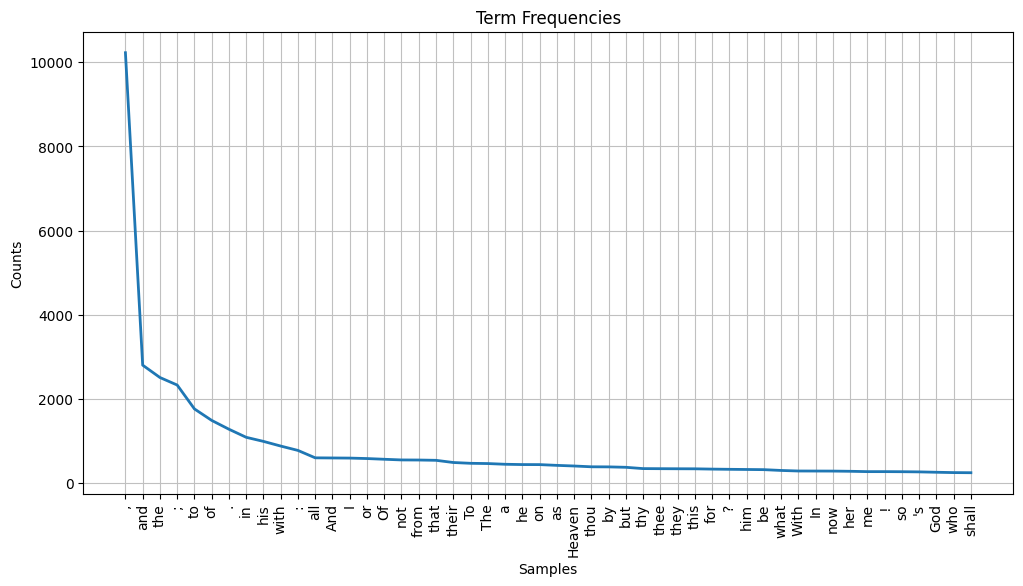

In [31]:
# Tokenize your corpus and calculate word frequencies
freqdist = nltk.FreqDist(tokens1)

# Plot term frequencies (top 50 words)
plt.figure(figsize=(12, 6))
freqdist.plot(50, title="Term Frequencies")
plt.show()

Zipf's Law

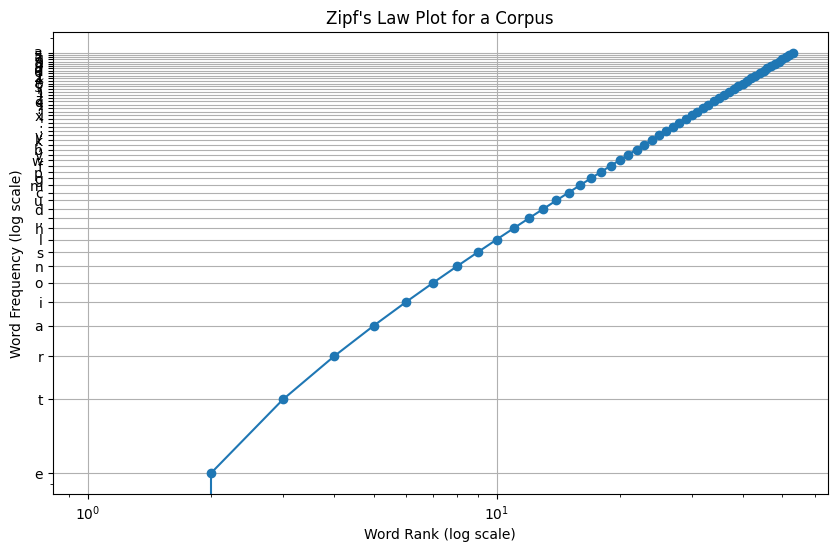

In [204]:
# Calculate word frequencies
word_freq = Counter(preprocessed_corpus)

# Sort word frequencies in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], 
                          reverse=True)

# Extract the frequencies and ranks
frequencies, _ = zip(*sorted_word_freq)

# Create a Zipf's law plot
plt.figure(figsize=(10, 6))
plt.loglog(range(1, len(frequencies) + 1), frequencies, marker="o",
           linestyle="-")
plt.title("Zipf's Law Plot for a Corpus")
plt.xlabel("Word Rank (log scale)")
plt.ylabel("Word Frequency (log scale)")
plt.grid(True)
plt.show()


Collocation

In [34]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Create a BigramCollocationFinder
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens1)

# Find the top 50 collocations using PMI
collocations = finder.nbest(bigram_measures.pmi, 50)

# Print the top 50 collocations and their counts
for collocation in collocations:
    print(" ".join(collocation))

'Why sleepest
Abhorred Styx
Amazonian targe
Ammonite Worshiped
Ask riddance
Asphaltic Pool
Avoided pinching
Bactrin Sophi
Behemoth biggest
Blind Thamyris
Bosporus betwixt
Burns frore
Call El
Causes import
Decrepit winter
Demoniack phrenzy
Despair Tended
Destroyers rightlier
Dropped manna
El Dorado
Elops drear
Evil-one abstracted
Fall circumvented
Faunus haunted
Floated redundant
Gliding meteorous
Gordian twine
Hameth northward
Head imbodied
Hellespont Bridging
Herculean Samson
Hid Amalthea
Horrour plumed
Huge Python
Inductive mainly
Lapland witches
Lavinia disespous
Luz Dreaming
Media post
Milton 1667
Obstruct Heaven-towers
Old Age
Orphean lyre
Paths indirect
Perplexes monarchs
Pest Forbore
Philistean Dalilah
Ply stemming
Proserpine gathering
Prove chaff


Plot

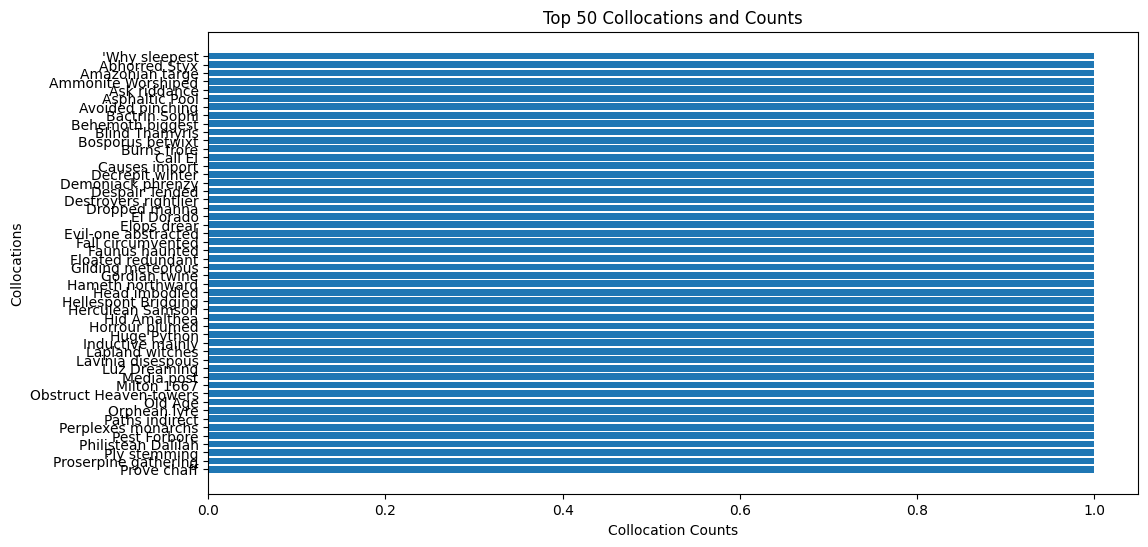

In [205]:
collocations = finder.nbest(bigram_measures.pmi, 50)

# Calculate collocation counts
collocation_counts = [finder.ngram_fd[collocation] for 
                      collocation in collocations]
collocation_terms = [" ".join(collocation) for collocation in
                     collocations]

plt.figure(figsize=(12, 6))
plt.barh(collocation_terms, collocation_counts)
plt.xlabel('Collocation Counts')
plt.ylabel('Collocations')
plt.title('Top 50 Collocations and Counts')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

N-grams

In [36]:
from nltk.util import ngrams
unigram_set = set(tokens1)
num_unique_unigrams = len(unigram_set)

num_unique_bigrams = len(set(ngrams(tokens1, 2)))
num_unique_trigrams = len(set(ngrams(tokens1, 3)))
num_unique_4grams = len(set(ngrams(tokens1, 4)))
num_unique_5grams = len(set(ngrams(tokens1, 5)))

print("Unique Unigrams:", num_unique_unigrams)
print("Unique Bigrams:", num_unique_bigrams)
print("Unique Trigrams:", num_unique_trigrams)
print("Unique 4-grams:", num_unique_4grams)
print("Unique 5-grams:", num_unique_5grams)

Unique Unigrams: 10986
Unique Bigrams: 58010
Unique Trigrams: 88230
Unique 4-grams: 94536
Unique 5-grams: 95399


In [37]:
#Sparsity
unigrams = list(ngrams(preprocessed_corpus, 1))
bigrams = list(ngrams(preprocessed_corpus, 2))
trigrams = list(ngrams(preprocessed_corpus, 3))
fourgrams = list(ngrams(preprocessed_corpus, 4))
fivegrams = list(ngrams(preprocessed_corpus, 5))

sparsity_unigrams = 1 - (len(set(unigrams)) / len(unigrams))
sparsity_bigrams = 1 - (len(set(bigrams)) / len(bigrams))
sparsity_trigrams = 1 - (len(set(trigrams)) / len(trigrams))
sparsity_4grams = 1 - (len(set(fourgrams)) / len(fourgrams))

print(sparsity_unigrams)
print(sparsity_bigrams)
print(sparsity_trigrams)
print(sparsity_4grams)

0.9998268149305136
0.9980067313662059
0.9830800348986534
0.9296240866848785


# Models

Unigram

In [122]:
textFD = FreqDist(word.lower() for word in tokens1)
def unigramLM(input11):
    total_tokens = len(tokens1)
    Prob_input = 1 #0 if log else 1

    for token in nltk.word_tokenize(input11):
        count_w = textFD[token]
        prob = count_w/total_tokens
    #Prob_input += math.log2(prob)
        print("(", token, ")", count_w, prob)
        Prob_input *= (count_w+1)/(total_tokens+1)
    return Prob_input


In [123]:
input11 = "paradise"
unigramLM(input11)

( paradise ) 54 0.0005641689999582098


0.0005746105707450087

Bigram

In [209]:
bigrams=ngrams(tokens1,2)
text2FD = nltk.FreqDist(tokens1 for tokens1 in bigrams)
def bigramLM(input22):
    prob_input = 1
    token7 = nltk.word_tokenize(input22)
    for i in range(len(token7)-1):
        countBigram = text2FD[(token7[i], token7[i+1])]
        countBase = textFD[token7[i]]
        print("(", token7[i], token7[i+1], ")", countBigram, countBase, (countBigram+1)/(countBase+len(token7)))
        #applied smoothing
        prob_input *= (countBigram+1)/(countBase+len(tokens1))

    return prob_input

In [125]:
input22 = "the paradise"
bigramLM(input22)

( the paradise ) 0 2964 0.00033715441672285906


1.0133765707336847e-05

Trigram

In [126]:
trigrams = ngrams(tokens1, 3)
text3gram = nltk.FreqDist(token for token in trigrams)
def trigramLM(input9):
  prob_input = 1
  token = nltk.word_tokenize(input9)
  for i in range(len(token)-2):
    counttrigram = text3gram[(token[i], token[i+1], token[i+2])]
    countBase = text2FD[(token[i], token[i+1])]
    print("(", token[i], token[i+1], token[i+2], ")", counttrigram,countBase, (counttrigram+1)/(countBase+len(token)))
    #laplace smoothing applied
    prob_input *= (counttrigram+1)/(countBase+len(token))

  return prob_input

In [127]:
input9 = "the paradise of"
trigramLM(input9)

( the paradise of ) 0 0 0.3333333333333333


0.3333333333333333

Spelling Correction

In [182]:
import difflib

# Define a list of correct words (you can extend this)
correct_words = tokens1

# Function to correct the spelling of a word
def correct_spelling(word):
    if word in correct_words:
        return word  # The word is correct

    # Find the closest matches in the list of correct words
    matches = difflib.get_close_matches(word, correct_words, n=3, cutoff=0.6)

    if matches:
        return matches  # Return suggestions
    else:
        return "No suggestions found"

# Test the spelling correction function
input_word = "powr"  # Replace with the word to correct
result = correct_spelling(input_word)
print(f"Input: {input_word}")
if isinstance(result, list):
    print("Suggestions:", result[:1])
else:
    print("Corrected: ", result[:1])


Input: powr
Suggestions: ['power']


Intrinsic Evaluation

In [202]:
#Accuracy
import difflib


# Function to correct the spelling of a word
def spelling(word):
    if word in correct_words:
        return word  # The word is correct

    # Find the closest matches in the list of correct words
    matches = difflib.get_close_matches(word, correct_words, n=3, cutoff=0.6)

    if matches:
        return matches  # Return suggestions
    else:
        return "No suggestions found"

# Define a dataset of misspelled words and their correct spellings
misspelled_words = ["powr", "fligt", "firt", "paret"]
correct_spellings = ["power", "flight", "first", "parent"]

# Calculate accuracy
correct_count = 0
total_count = len(misspelled_words)

for i in range(total_count):
    suggested_word = spelling(misspelled_words[i])
    if suggested_word != "No suggestions found" and suggested_word[0] == correct_spellings[i]:
        correct_count += 1

accuracy = correct_count / total_count * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 100.00%


# REPORT

a) CORPUS used in this project is "milton-paradise.txt" from gutenberg.I preproccessed the corpus which includes tokenization,
removing stopwords,stemming.

b)I checked the corpus with herden's law and got an ideal curve which says the data is good.After that I built the vocabulary but as there were many mispelled words I used spellchecker() in building it.
         I manage the zero counts using laplace smoothing and plotted the terms vs their counts.I verified Zipf's law too.Plotted top 50 collocations and its count.(All the plots and images are above)

c)calculated the N-grams using ngrams function in the corpus.Sparsity of each ngrams are calculated and printed.

d)Trained Langauge models(unigram,bigram,trigram) and inputed and tested each model.In this I created 3 models.

e)I created the application SPELLING CHECKER through the language model by using its tokens as correct words in it.I did an EXTRINSIC EVALUATION and the application is returning all the words in the corpus correctly but words outside the corpus tokens are incorrectly predicted.As a part of intrinsic evaluation I calculated its accuracy by taking 4 words from the tokens itself and application predicted all the 4 words correctly.But the words outside corpus are all predicted incorrectly.




